<a href="https://colab.research.google.com/github/melanieshimano/bmore-city-salaries-exploration/blob/main/2021_04_05_intro_python_baltimoresalarydata_melanieshimano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Python with Baltimore City Salary Data


This is a notebook to begin using Python for data analysis

## some general notes about python

In [100]:
#  my name is melanie
print("melanie") # this is some basic python code

# this is a note
# this is another note
# here's a third note

'''notes
that
are 
kept
in 
paragraphs'''

melanie


'notes\nthat\nare \nkept\nin \nparagraphs'

## import libraries

In [101]:
# import libraries

# data analysis
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import plotly.express as px

# download files to our computer
from google.colab import files 

## import data

download data from [this github repository](https://github.com/jhu-business-analytics/bmore-city-salaries-exploration)

In [102]:
# import csv of baltimore city salary data

# save github csv link
salary_data = "https://raw.githubusercontent.com/jhu-business-analytics/bmore-city-salaries-exploration/main/Baltimore_Employee_Salaries.csv"

#define our initial dataframe
df_salary = pd.read_csv(salary_data)


## look at our data

In [103]:
# preview the first five rows
df_salary.head()

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
0,201,Desiree,C,Alston,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011,1
1,101,Maude,E,Akins,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011,2
2,301,Shavonna,A,Anderson,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011,3
3,51,Margaret,E,Adams,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011,4
4,1,Patricia,G,Aaron,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011,5


In [104]:
# preview last five rows of the data
df_salary.tail()

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear,ObjectId
154643,154582,Shane,NaN,Young,WW Opns Tech II Sanitary,A50207,DPW-Water & Waste Water (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,154644
154644,154583,Thomas,G,Young,Police Officer EID,A99322,Police Department (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,154645
154645,154584,Valerie,K,Young,Operations Officer II,A14003,FIN-Collections (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,154646
154646,154585,Veronica,W,Young,Office Assistant III,A75014,Enoch Pratt Free Library (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,154647
154647,154586,Wendy,NaN,Young,Court Secretary I,A31012,Circuit Court (012),2014/03/24 04:00:00+00,62223.0,62425.39,FY2020,154648


In [105]:
# general stats to help us understand the data
df_salary.describe()

,ID,AnnualSalary,GrossPay,ObjectId
count,154648.000000,154648.000000,146169.000000,154648.000000
mean,77324.500000,48678.951298,51740.542706,77324.500000
std,44643.176552,25924.841964,33734.963014,44643.176552
min,1.000000,0.000000,-1349.000000,1.000000
25%,38662.750000,31137.000000,30338.490000,38662.750000
50%,77324.500000,45475.000000,49010.420000,77324.500000
75%,115986.250000,66086.000000,71819.670000,115986.250000
max,154648.000000,275000.000000,373111.190000,154648.000000


In [106]:
# delete the object id column

del df_salary["ObjectId"]

## cleaning data appearance

In [107]:
df_salary.head(10)

,ID,FirstName,MI,LastName,JobTitle,AgencyID,AgencyName,HireDate,AnnualSalary,GrossPay,FiscalYear
0,201,Desiree,C,Alston,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-Health Department,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011
1,101,Maude,E,Akins,DATA ENTRY OPERATOR II,A49300,TRANS-Highways,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011
2,301,Shavonna,A,Anderson,EMERGENCY DISPATCHER,A99372,Police Department,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011
3,51,Margaret,E,Adams,PROGRAM ASSISTANT I,A65200,HLTH-Health Department,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011
4,1,Patricia,G,Aaron,Facilities/Office Services II,A03031,OED-Employment Dev,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011
5,202,Emmanuel,R,Alston,JTPA TRAINEE MOMR,W03T16,Youth Cust,2007/06/23 04:00:00+00,15080.0,1253.32,FY2011
6,203,Frank,M,Alston,POLICE OFFICER,A99395,Police Department,1987/12/07 05:00:00+00,67381.0,64195.59,FY2011
7,204,Henry,L,Alston,MECHANICAL MAINT TECH III,A50101,DPW-Water & Waste Water,1993/10/12 04:00:00+00,42921.0,39521.86,FY2011
8,205,James,NaN,Alston,LABORER,B49308,TRANS-Highways,1999/12/20 05:00:00+00,28891.0,26335.44,FY2011
9,206,Jeffrey,NaN,Alston,DIRECTOR HUMAN RESOURCES,A91011,M-R Convention Center,2005/04/28 04:00:00+00,68500.0,58488.82,FY2011


In [108]:
df_salary.columns.tolist()

['ID',
 'FirstName',
 'MI',
 'LastName',
 'JobTitle',
 'AgencyID',
 'AgencyName',
 'HireDate',
 'AnnualSalary',
 'GrossPay',
 'FiscalYear']

In [109]:
# making all of the column headers into lowercase
df_salary.columns = df_salary.columns.str.lower()

In [110]:
# make all items in jobtitle uppercase
df_salary["jobtitle"] = df_salary["jobtitle"].str.upper()
df_salary["agencyname"] = df_salary["agencyname"].str.upper()

In [111]:
# make a loop to change a list of columns into uppercase

# define the word column list
word_col = [
 'firstname',
 'mi',
 'lastname',
 'jobtitle',
 'agencyid',
 'agencyname']

# create a for loop to make all columns in list to uppercase
for column in word_col:
   df_salary[column] = df_salary[column].str.upper()


In [112]:
df_salary.head()

,id,firstname,mi,lastname,jobtitle,agencyid,agencyname,hiredate,annualsalary,grosspay,fiscalyear
0,201,DESIREE,C,ALSTON,SCHOOL HEALTH AIDE (10 MONTHS),A65105,HLTH-HEALTH DEPARTMENT,2009/10/29 04:00:00+00,23395.0,20482.58,FY2011
1,101,MAUDE,E,AKINS,DATA ENTRY OPERATOR II,A49300,TRANS-HIGHWAYS,2002/11/25 05:00:00+00,31609.0,28525.11,FY2011
2,301,SHAVONNA,A,ANDERSON,EMERGENCY DISPATCHER,A99372,POLICE DEPARTMENT,2001/11/29 05:00:00+00,44331.0,44093.40,FY2011
3,51,MARGARET,E,ADAMS,PROGRAM ASSISTANT I,A65200,HLTH-HEALTH DEPARTMENT,2008/05/05 04:00:00+00,33841.0,30336.61,FY2011
4,1,PATRICIA,G,AARON,FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,1979/10/24 04:00:00+00,50845.0,45505.94,FY2011


# basic data manipulation

In [113]:
# add an "overtime" column
df_salary["overtime"] = df_salary["grosspay"] - df_salary["annualsalary"]

In [121]:
df_salary.tail(10)

,id,firstname,mi,lastname,jobtitle,agencyid,agencyname,hiredate,annualsalary,grosspay,fiscalyear,overtime,fullname,agencyname_only
154638,154577,MARVIN,M,YOUNG,WW TECH SUPV II SANITARY,A50208,DPW-WATER & WASTE WATER (208),1982/05/17 04:00:00+00,68533.0,81030.34,FY2020,12497.34,MARVIN YOUNG,DPW
154639,154578,MELVIN,NaN,YOUNG,SOLID WASTE DRIVER,B70411,DPW-SOLID WASTE (WKLY) (411),1995/06/26 04:00:00+00,46615.0,48387.44,FY2020,1772.44,MELVIN YOUNG,DPW
154640,154579,MORGAN,M,YOUNG,COMMUNITY AIDE,A49109,TRANS-HIGHWAYS (109),2019/07/01 04:00:00+00,21840.0,525.00,FY2020,-21315.00,MORGAN YOUNG,TRANS
154641,154580,NATHAN,A,YOUNG,TREE SERVICE SUPV I,A68001,R&P-PARKS (001),2001/11/05 05:00:00+00,44029.0,59786.24,FY2020,15757.24,NATHAN YOUNG,R&P
154642,154581,RICKIE,L,YOUNG,LABORER,A50553,DPW-WATER & WASTE WATER (553),2015/11/23 05:00:00+00,33933.0,48901.41,FY2020,14968.41,RICKIE YOUNG,DPW
154643,154582,SHANE,NaN,YOUNG,WW OPNS TECH II SANITARY,A50207,DPW-WATER & WASTE WATER (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,19411.32,SHANE YOUNG,DPW
154644,154583,THOMAS,G,YOUNG,POLICE OFFICER EID,A99322,POLICE DEPARTMENT (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,28734.52,THOMAS YOUNG,POLICE DEPARTMENT
154645,154584,VALERIE,K,YOUNG,OPERATIONS OFFICER II,A14003,FIN-COLLECTIONS (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,-2903.07,VALERIE YOUNG,FIN
154646,154585,VERONICA,W,YOUNG,OFFICE ASSISTANT III,A75014,ENOCH PRATT FREE LIBRARY (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,476.77,VERONICA YOUNG,ENOCH PRATT FREE LIBRARY
154647,154586,WENDY,NaN,YOUNG,COURT SECRETARY I,A31012,CIRCUIT COURT (012),2014/03/24 04:00:00+00,62223.0,62425.39,FY2020,202.39,WENDY YOUNG,CIRCUIT COURT


In [115]:
# add letter (strings)
df_salary["fullname"] = df_salary["firstname"] + " " + df_salary["lastname"]

### splitting data in columns or removing data based on delimeters

In [118]:
# create column for only agency name
df_salary["agencyname_only"] = df_salary["agencyname"].str.split("-", 1, expand = True)

In [120]:
# remove the location numbers 
df_salary["agencyname_only"] = df_salary["agencyname_only"].str.split("(", 1, expand = True)

### filtering information

In [122]:
# how many job titles are there?
df_salary["jobtitle"].nunique()

1815

In [ ]:
# what are the job titles names?
df_salary["jobtitle"].unique().tolist()

In [125]:
# create a df for FY 2020

df_salary_2020 = df_salary[df_salary["fiscalyear"] == "FY2020"]

In [127]:
df_salary_2020.tail()

,id,firstname,mi,lastname,jobtitle,agencyid,agencyname,hiredate,annualsalary,grosspay,fiscalyear,overtime,fullname,agencyname_only
154643,154582,SHANE,NaN,YOUNG,WW OPNS TECH II SANITARY,A50207,DPW-WATER & WASTE WATER (207),2006/06/24 04:00:00+00,46107.0,65518.32,FY2020,19411.32,SHANE YOUNG,DPW
154644,154583,THOMAS,G,YOUNG,POLICE OFFICER EID,A99322,POLICE DEPARTMENT (322),2010/10/13 04:00:00+00,79923.0,108657.52,FY2020,28734.52,THOMAS YOUNG,POLICE DEPARTMENT
154645,154584,VALERIE,K,YOUNG,OPERATIONS OFFICER II,A14003,FIN-COLLECTIONS (003),2011/06/16 04:00:00+00,72730.0,69826.93,FY2020,-2903.07,VALERIE YOUNG,FIN
154646,154585,VERONICA,W,YOUNG,OFFICE ASSISTANT III,A75014,ENOCH PRATT FREE LIBRARY (014),1973/08/27 04:00:00+00,43759.0,44235.77,FY2020,476.77,VERONICA YOUNG,ENOCH PRATT FREE LIBRARY
154647,154586,WENDY,NaN,YOUNG,COURT SECRETARY I,A31012,CIRCUIT COURT (012),2014/03/24 04:00:00+00,62223.0,62425.39,FY2020,202.39,WENDY YOUNG,CIRCUIT COURT


In [128]:
df_salary_2020["fiscalyear"].unique()

array(['FY2020'], dtype=object)

# Aggregating Salary Data based on fiscal year

In [131]:
# use groupby to aggregate means of salary data
df_salary_agg = df_salary.groupby("fiscalyear")["annualsalary"].agg(["mean"]).reset_index()

In [132]:
df_salary_agg

,fiscalyear,mean
0,FY2011,46006.618203
1,FY2012,43398.358849
2,FY2013,38289.855328
3,FY2014,39756.791968
4,FY2015,51708.083521
5,FY2016,53032.957121
6,FY2017,54899.880294
7,FY2018,56751.774026
8,FY2019,57845.282680
9,FY2020,52628.143628


In [133]:
# use groupby to aggregate means of salary data
df_salary_agg = df_salary.groupby("fiscalyear").agg({"annualsalary": "mean",
                                                     "grosspay": "mean",
                                                     "overtime": "mean"}).reset_index()

In [134]:
df_salary_agg

,fiscalyear,annualsalary,grosspay,overtime
0,FY2011,46006.618203,42322.026667,-3684.591536
1,FY2012,43398.358849,43172.322018,-226.036831
2,FY2013,38289.855328,44309.964659,713.393267
3,FY2014,39756.791968,45638.742582,285.587338
4,FY2015,51708.083521,55785.481759,3602.270840
5,FY2016,53032.957121,56330.843127,2822.859184
6,FY2017,54899.880294,58405.675966,2623.656358
7,FY2018,56751.774026,60729.312142,3684.382028
8,FY2019,57845.282680,62300.946575,3355.208127
9,FY2020,52628.143628,53161.883139,533.739510


In [143]:
df_salary_agg = df_salary_agg.rename(columns = {"annualsalary": "average_annual_salary",
                                                     "grosspay": "average_gross_pay",
                                                     "overtime": "average_overtime"})

In [147]:
df_salary_agg

,fiscal_year,average_annual_salary,average_gross_pay,average_overtime
0,FY2011,46006.618203,42322.026667,-3684.591536
1,FY2012,43398.358849,43172.322018,-226.036831
2,FY2013,38289.855328,44309.964659,713.393267
3,FY2014,39756.791968,45638.742582,285.587338
4,FY2015,51708.083521,55785.481759,3602.270840
5,FY2016,53032.957121,56330.843127,2822.859184
6,FY2017,54899.880294,58405.675966,2623.656358
7,FY2018,56751.774026,60729.312142,3684.382028
8,FY2019,57845.282680,62300.946575,3355.208127
9,FY2020,52628.143628,53161.883139,533.739510


In [146]:
df_salary_agg.columns = ["fiscal_year", "average_annual_salary", "average_gross_pay", "average_overtime"]

# Data Visualizations with Matplotlib

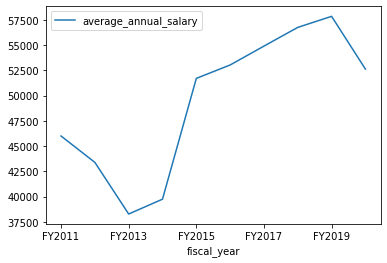

In [148]:
# plot annual salary averages in a line graph
df_salary_agg.plot(x = "fiscal_year", y = "average_annual_salary", kind = "line")

Text(0, 0.5, 'US Dollars')

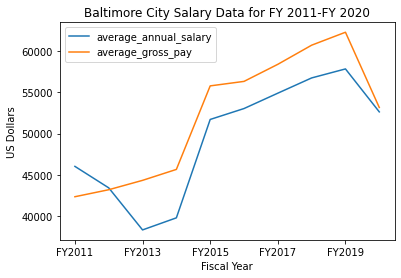

In [154]:
#first define that we are using the same axis for both graphs
fy_agg_fig = plt.figure()

ax = plt.gca(title = "Baltimore City Salary Data for FY 2011-FY 2020")

# plot the values in lines
df_salary_agg.plot(x = "fiscal_year", y = "average_annual_salary", kind = "line", ax = ax)
df_salary_agg.plot(x = "fiscal_year", y = "average_gross_pay", kind = "line", ax = ax)

#define x and y axes titles
plt.xlabel("Fiscal Year")
plt.ylabel("US Dollars")

In [155]:
# save our graph
fy_agg_fig.savefig("fy_trend_bmore.png")

In [156]:
#downloading the files from google colab
files.download("fy_trend_bmore.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### make a fast graph with a df

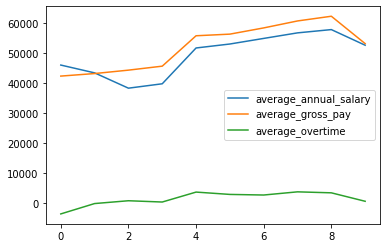

In [158]:
df_salary_agg.plot()

# Data Visualizations with Plotly Express

In [159]:
# melt dataframe to work easier with plotly express
df_agg_melt = pd.melt(df_salary_agg, id_vars = ["fiscal_year"])

In [161]:
df_agg_melt.head()

,fiscal_year,variable,value
0,FY2011,average_annual_salary,46006.618203
1,FY2012,average_annual_salary,43398.358849
2,FY2013,average_annual_salary,38289.855328
3,FY2014,average_annual_salary,39756.791968
4,FY2015,average_annual_salary,51708.083521


In [170]:
# make line graph in plotly express
fiscal_trend_line = px.line(df_agg_melt, x = "fiscal_year", y = "value", color = "variable",
                            title = "Baltimore City Salary Data for FY 2011-FY 2020",
                            labels = {"fiscal_year": "Fiscal Year", "value": "US Dollar Amount", "variable": "Type of Pay", "average_annual_salary": "Average Annual Salary", "average_gross_pay": "Average Gross Pay", "average_overtime": "Average Overtime"})

In [171]:
fiscal_trend_line

In [172]:
# save this as an html file so that other people can play with the interactiveness
fiscal_trend_line.write_html("plotly_line_bmoresalary.html")

In [173]:
#download from google
files.download("plotly_line_bmoresalary.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>